In [1]:
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
import tensorflow as tf

from random import randrange

import numpy as np
import matplotlib.pyplot as plt
from os import path, getcwd, chdir

In [2]:
path = f"{getcwd()}/mnist.npz"
mnist = tf.keras.datasets.mnist
(X_train, Y_train), (X_test, Y_test) = mnist.load_data(path=path)

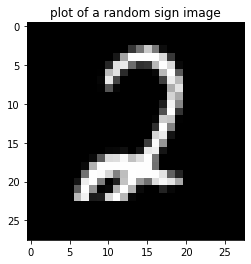

label of shown image is 2


In [3]:
r = randrange(X_train.shape[0])
plt.imshow(X_train[r], interpolation='nearest', cmap='gray')
plt.title('plot of a random sign image')
plt.show()
print('label of shown image is', Y_train[r])

In [4]:
print("X_train :",X_train.shape,
      "Y_train :",Y_train.shape,
     "\nX_test :",X_test.shape,
     "Y_test :",Y_test.shape)

X_train : (60000, 28, 28) Y_train : (60000,) 
X_test : (10000, 28, 28) Y_test : (10000,)


In [5]:
X_train = X_train.reshape(60000, 28, 28, 1)
X_train = X_train.astype('float32')/255.
X_test = X_test.reshape(10000, 28, 28, 1)
X_test = X_test.astype('float32')/255.
# K.clear_session()

In [7]:
input_img = Input(shape=(28, 28, 1))

x = Conv2D(16, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
layer1 = Model(input_img, x, name='layer1')

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
layer2 = Model(input_img, x, name='layer2')

x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)
layer3 = Model(input_img, x, name='layer3')

encoded = Conv2D(4, (1,1), activation='relu', padding='same', name='encoded_img')(x)
encoder = Model(input_img, encoded, name='encoder')
layer1.summary()

Model: "layer1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
Total params: 160
Trainable params: 160
Non-trainable params: 0
_________________________________________________________________


In [13]:
print('layer1 output:',layer1.output); print()
print('layer2 output:',layer2.output); print()
print('layer3 output:',layer3.output); print()
print(encoder.summary())

layer1 output: Tensor("max_pooling2d_3/Identity:0", shape=(None, 14, 14, 16), dtype=float32)

layer2 output: Tensor("max_pooling2d_4/Identity:0", shape=(None, 7, 7, 8), dtype=float32)

layer3 output: Tensor("max_pooling2d_5/Identity:0", shape=(None, 4, 4, 8), dtype=float32)

Model: "encoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)   

In [14]:
x = Conv2D(8, (3, 3), activation='relu', padding='same')(encoded)
x = UpSampling2D((2, 2))(x)
x = Conv2D(8, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(16, (3, 3), activation='relu')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same', name='decoded_img')(x)

autoencoder = Model(input_img, decoded, name='autoencoder')
autoencoder.compile(optimizer='Adam', loss='binary_crossentropy')
autoencoder.summary()

Model: "autoencoder"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 28, 28, 16)        160       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 14, 14, 8)         1160      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 8)           0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 7, 7, 8)           584       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 4, 4, 8)           

In [15]:
history = autoencoder.fit(X_train, X_train,
                epochs=40,
                batch_size=64,
                shuffle=True,
                validation_data=(X_test, X_test))

Epoch 1/40
938/938 [==============================] - 33s 35ms/step - loss: 0.1970 - val_loss: 0.1399
Epoch 2/40
938/938 [==============================] - 33s 36ms/step - loss: 0.1328 - val_loss: 0.1251
Epoch 3/40
938/938 [==============================] - 34s 36ms/step - loss: 0.1216 - val_loss: 0.1177
Epoch 4/40
938/938 [==============================] - 36s 38ms/step - loss: 0.1157 - val_loss: 0.1125
Epoch 5/40
938/938 [==============================] - 34s 36ms/step - loss: 0.1116 - val_loss: 0.1091
Epoch 6/40
938/938 [==============================] - 37s 39ms/step - loss: 0.1084 - val_loss: 0.1062
Epoch 7/40
938/938 [==============================] - 35s 37ms/step - loss: 0.1062 - val_loss: 0.1045
Epoch 8/40
938/938 [==============================] - 35s 37ms/step - loss: 0.1044 - val_loss: 0.1024
Epoch 9/40
938/938 [==============================] - 36s 38ms/step - loss: 0.1029 - val_loss: 0.1012
Epoch 10/40
938/938 [==============================] - 35s 38ms/step - loss: 0.101

Training loss after 40 epochs: 0.0915


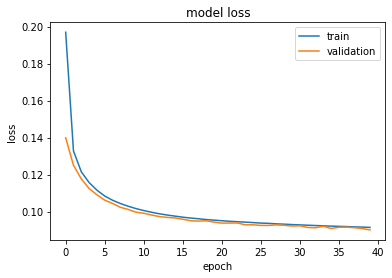

In [16]:
print('Training loss after 40 epochs: %.4f'%history.history['loss'][-1])
# plot the loss curves
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [17]:
# save the trained model
layer1.save("layer1")
layer2.save("layer2")
layer3.save("layer3")
encoder.save("encoder")
autoencoder.save("autoencoder")

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: layer1/assets
INFO:tensorflow:Assets written to: layer2/assets
INFO:tensorflow:Assets written to: layer3/assets
INFO:tensorflow:Assets written to: encoder/assets
INFO:tensorflow:Assets written to: autoencoder/assets


In [18]:
decoded_imgs = autoencoder.predict(X_test)
decoded_imgs.shape

(10000, 28, 28, 1)

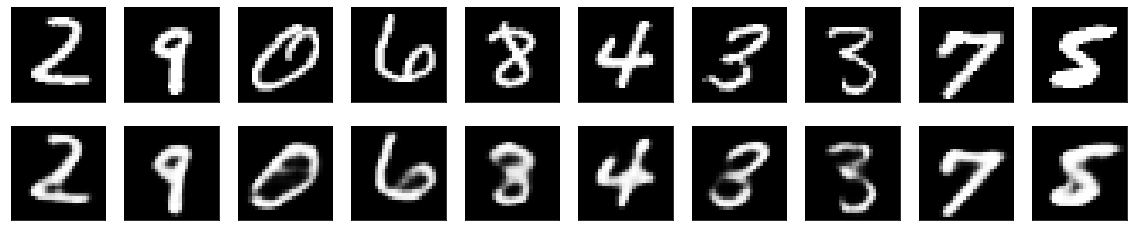

In [19]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  r = randrange(X_test.shape[0])
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(X_test[r].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  # display reconstruction
  ax = plt.subplot(2, n, i +1 + n)
  plt.imshow(decoded_imgs[r].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

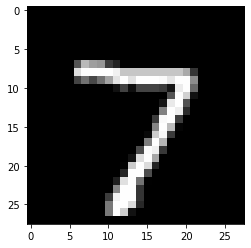

In [21]:
plt.imshow(X_test[0].squeeze());

In [24]:
pred1 = layer1.predict(X_test[0].reshape(1,28,28,1)).squeeze()
pred2 = layer2.predict(X_test[0].reshape(1,28,28,1)).squeeze()
pred3 = layer3.predict(X_test[0].reshape(1,28,28,1)).squeeze()
encoded_img = encoder.predict(X_test[0].reshape(1,28,28,1)).squeeze()
print(pred1.shape)
print(pred2.shape)
print(pred3.shape)
print(encoded_img.shape)

(14, 14, 16)
(7, 7, 8)
(4, 4, 8)
(4, 4, 4)


In [45]:
import random
random.sample(range(5), 5)

[0, 4, 2, 1, 3]

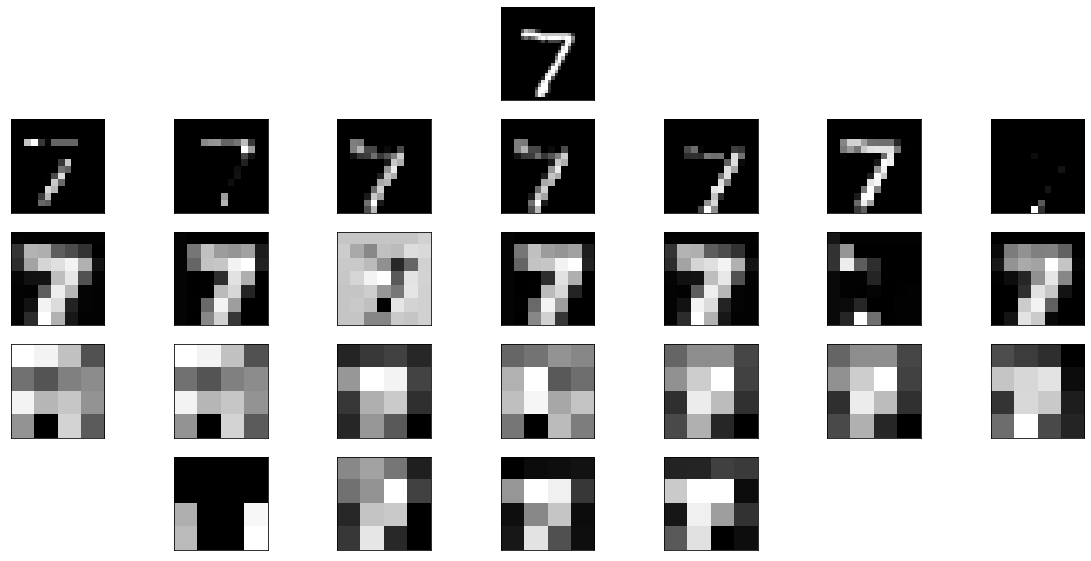

In [51]:
import random
plt.figure(figsize=(20, 10))
a = 4
ax = plt.subplot(5,7,a)
ax.imshow(X_test[0].squeeze())
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
a=8
for i in range(7):
    arr = random.sample(range(16), 7)
    ax = plt.subplot(5,7,a)
    ax.imshow(pred1[:,:,arr[i]]);
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    a+=1
    
for i in range(7):
    arr = random.sample(range(8), 7)
    ax = plt.subplot(5,7,a)
    ax.imshow(pred2[:,:,arr[i]]);
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    a+=1
    
for i in range(7):
    arr = random.sample(range(8), 7)
    ax = plt.subplot(5,7,a)
    ax.imshow(pred3[:,:,arr[i]]);
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    a+=1
a+=1    
for i in range(4):
    ax = plt.subplot(5,7,a)
    ax.imshow(encoded_img[:,:,i]);
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
    a+=1

## Let us try to explore how the neural network is actually encoding the numbers. The following illustrates how two instances of 5 and 3 instances of 7 are encoded and then decoded. Note that each encoding consists of 4 channels, each with 16 pixels. 

In [53]:
encoded_imgs = encoder.predict(X_test)
encoded_imgs.shape

(10000, 4, 4, 4)

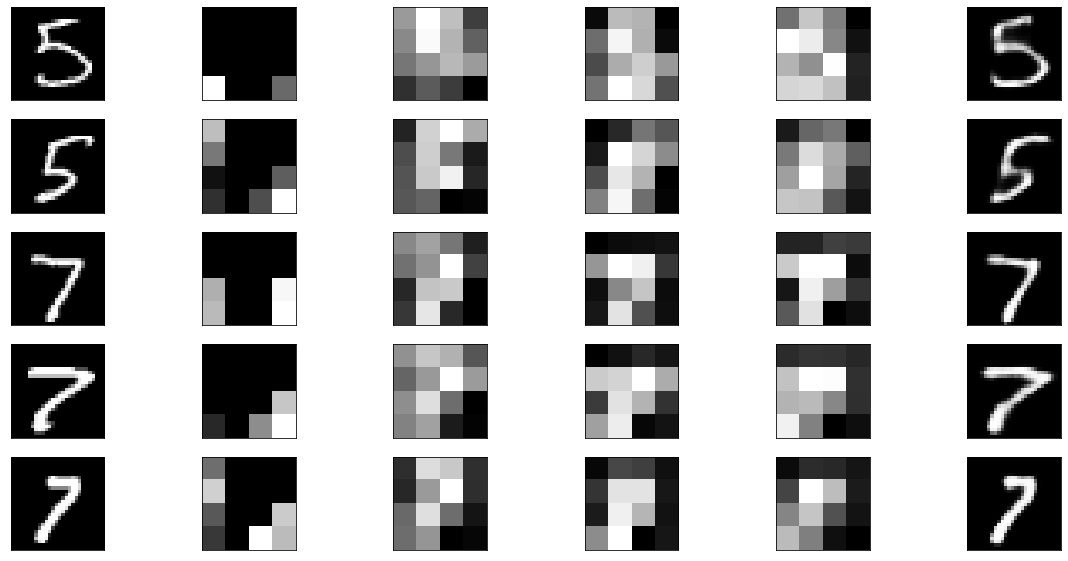

In [54]:
n = 5
I = [15, 23, 0, 4487, 8003]
plt.figure(figsize=(20, 10))
a = 1
for i in range(n):
  # display original
  ax = plt.subplot(n, 6, a)
  plt.imshow(X_test[I[i]].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  # display encodings
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,0])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,1])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,2])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  ax = plt.subplot(n, 6, a)
  plt.imshow(encoded_imgs[I[i],:,:,3])
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
  # display reconstruction
  ax = plt.subplot(n, 6, a)
  plt.imshow(decoded_imgs[I[i]].reshape(28, 28))
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
  a+=1
plt.show()